# Exercise: Wake deflection

In this exercise you can investigate the wake-deflection effects of yaw-misalignment

In [54]:
# Install PyWake if needed
try:
    import py_wake
except ModuleNotFoundError:
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

In [55]:
# setup site, wind turbines and wind farm model
from py_wake.examples.data.iea37._iea37 import IEA37Site, IEA37_WindTurbines
from py_wake.deficit_models.gaussian import BastankhahGaussian
from py_wake.deflection_models.jimenez import JimenezWakeDeflection
import numpy as np
from ipywidgets import interact
from ipywidgets import IntSlider
from py_wake.flow_map import HorizontalGrid
import matplotlib.pyplot as plt
site = IEA37Site(16)
x, y = [0, 600, 1200], [0, 0, 0]  # site.initial_position[:2].T
windTurbines = IEA37_WindTurbines()
wfm = BastankhahGaussian(site, windTurbines, deflectionModel=JimenezWakeDeflection())

In [56]:
# define function that plots the flow field and AEP history of 3 wind turbines
def plot_flow_field_and_aep(WT0, WT1):
    
    #_, (ax1, ax2) = plt.subplots(2,1,figsize=(20,6))
    ax1 = plt.figure(figsize=(20,4)).gca()
    ax2 = plt.figure(figsize=(10,3)).gca()
    
    sim_res = wfm(x, y, yaw=np.reshape([WT0,WT1,0],(3,1,1)), wd=270, ws=10)
    sim_res.flow_map(HorizontalGrid(x = np.linspace(0,1400,200), y=np.linspace(-200,200,50))).plot_wake_map(ax=ax1)
    ax1.set_xlim([-200,1400])
    aep.append(sim_res.aep().values[:,0,0])
    aep_arr = np.array(aep)                                     
    for i in range(3):
        ax2.plot(aep_arr[:,i], '.-', label='WT%d, %.2f'%(i,aep_arr[-1,i]))
    ax2.plot(aep_arr.sum(1), '.-', label='Total, %.2f'%aep_arr[-1].sum())
    ax2.axhline(aep_arr[0].sum(),ls='--',c='r')
    ax2.set_ylabel('AEP [GWh]')
    ax2.set_xlabel('Iteration')
    ax2.legend(loc='upper left')
    
    

interactive(children=(IntSlider(value=0, continuous_update=False, description='WT0', max=50, min=-50), IntSlid…

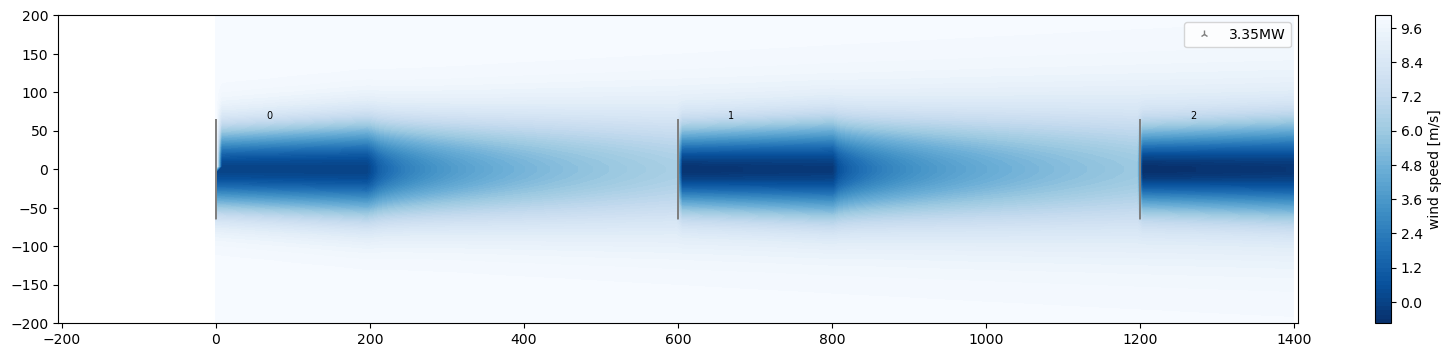

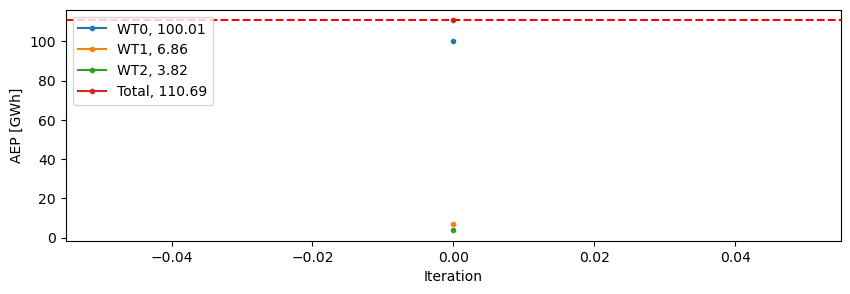

In [57]:
# Run the plot_flow_field_and_aep function when moving the sliders
aep = []
_ = interact(plot_flow_field_and_aep, 
             WT0=IntSlider(min=-50, max=50, step=1, value=0, continuous_update=False),
             WT1=IntSlider(min=-50, max=50, step=1, value=0, continuous_update=False))

Move the sliders below and try to find the optimal yaw-misalignment of WT0 and WT1 with respect to total aep